In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import adjustText as aT

In [2]:
plt.rcParams["font.family"] = 'NanumGothic'
df = gpd.read_file("SIG/TL_SCCO_SIG.shp", encoding='euc-kr')

In [3]:
df['si'] = df['SIG_KOR_NM'].str[0:3]

In [4]:
서부 = [27230, 27290, 27170, 27710, 47850]
동부 = [27110, 27200, 27140, 27260]
경북 = ['문경시', '영주시', '봉화군', '울진군', '예천군', '안동시', '영양군', '상주시', '의성군', '청송군', '영덕군', '김천시', '구미시', '군위군', '포항시', '성주군', '고령군', '경주시', '청도군']
경산하양 = [47290]

In [5]:
#<경산 하양 분리>
df2 = gpd.read_file("EMD_201905/TL_SCCO_EMD.shp", encoding='euc-kr')
df2 = df2[df2['EMD_CD'].str.slice(start=0, stop=5) == '47290']
df2.head()
df.rename(columns={'SIG_CD': 'CD', 'SIG_ENG_NM': 'ENG_NM', 'SIG_KOR_NM': 'KOR_NM'}, inplace=True)
df2.rename(columns={'EMD_CD': 'CD', 'EMD_ENG_NM': 'ENG_NM', 'EMD_KOR_NM': 'KOR_NM'}, inplace=True)

In [6]:
#하양
하양 = ['압량면', '진량읍', '하양읍', '와촌면']
경산 = []

all = list(df2['KOR_NM'])
print(all)
경산 = list(set(all) - set(하양))

['삼남동', '삼북동', '서상동', '신교동', '상방동', '백천동', '옥곡동', '사정동', '옥산동', '중산동', '정평동', '대평동', '대정동', '임당동', '대동', '계양동', '중방동', '조영동', '남방동', '내동', '여천동', '유곡동', '신천동', '점촌동', '평산동', '사동', '삼풍동', '갑제동', '하양읍', '진량읍', '와촌면', '자인면', '용성면', '남산면', '압량면', '남천면']


In [7]:
tk = pd.DataFrame()
for i in 동부:
    temp=df[df['CD'].str.contains(str(i))]
    temp['state'] = '동부'
    tk = tk.append(temp)

C:\Users\mws10\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [8]:
for i in 서부:
    temp=df[df['CD'].str.contains(str(i))]
    temp['state'] = '서부'
    tk = tk.append(temp)

C:\Users\mws10\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
for i in 경북:
    temp=df[df['KOR_NM'].str.contains(str(i))]
    temp['state'] = '경북'
    tk = tk.append(temp)  

C:\Users\mws10\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
for i in range(1):
    temp=df[df['KOR_NM'].str.contains('경산시')]
    temp['state'] = '경산'
    tk = tk.append(temp)

C:\Users\mws10\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
for i in 하양:
    temp=df2[df2['KOR_NM'].str.contains(str(i))]
    temp['state'] = '하양'
    tk = tk.append(temp)
    
temp=df[df['KOR_NM'].str.contains(str('영천시'))]
temp['state'] = '하양'
tk = tk.append(temp)
tk.head(2)

C:\Users\mws10\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mws10\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,
C:\Users\mws10\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,CD,ENG_NM,KOR_NM,geometry,si,state
41,27110,Jung-gu,중구,"POLYGON ((1099266.034 1764845.475, 1099328.023...",중구,동부
44,27200,Nam-gu,남구,"POLYGON ((1097464.450 1762903.002, 1097774.420...",남구,동부


In [12]:
tk["rep"] = tk["geometry"].representative_point()
tk_points = tk.copy()
tk_points.set_geometry("rep", inplace = True)

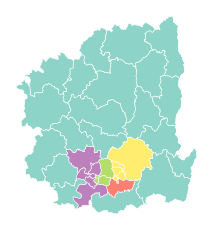

In [13]:
ax = figsize=(19.20,10.80)
ax = tk.plot(edgecolor="w",column="state",cmap = 'Set3', linewidth = 0.5)
texts = []
"""
for x, y, label in zip(tk_points.geometry.x, tk_points.geometry.y, tk_points["KOR_NM"]):
    texts.append(plt.text(x, y, label, fontsize = 4)) #, bbox=dict(facecolor="w", alpha=0.2, linewidth = 0)))

aT.adjust_text(texts, force_points=0, force_text=0, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='grey', lw=0))
"""
ax.set_axis_off()
plt.savefig("대경.png", dpi=600)